# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

In [4]:
df = pd.read_csv('creditcard.csv')

# Exploratory Data Analysis

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())

Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0:  284315
Number Of Records With The Class Value 1:  492


In [8]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

In [10]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
print('Amount details of valid transaction')
valid.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

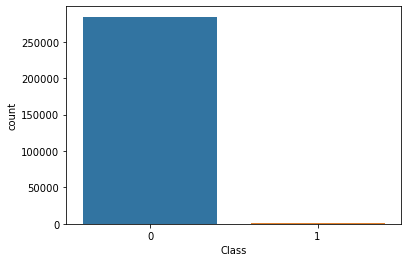

In [12]:
sns.countplot(x='Class', data=df)

# Feature Selection

In [13]:
# Calculate the correlation between the 'Class' column and the first 30 columns 
x = df.corr()['Class'][:30]
x

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

<AxesSubplot:title={'center':'Correlation Of Features With Target Variable'}>

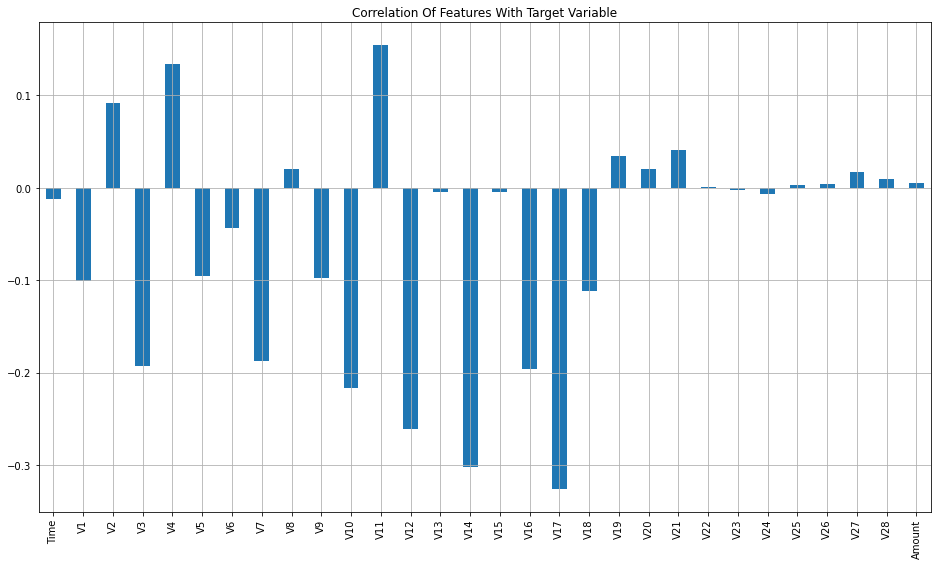

In [14]:
# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

<AxesSubplot:>

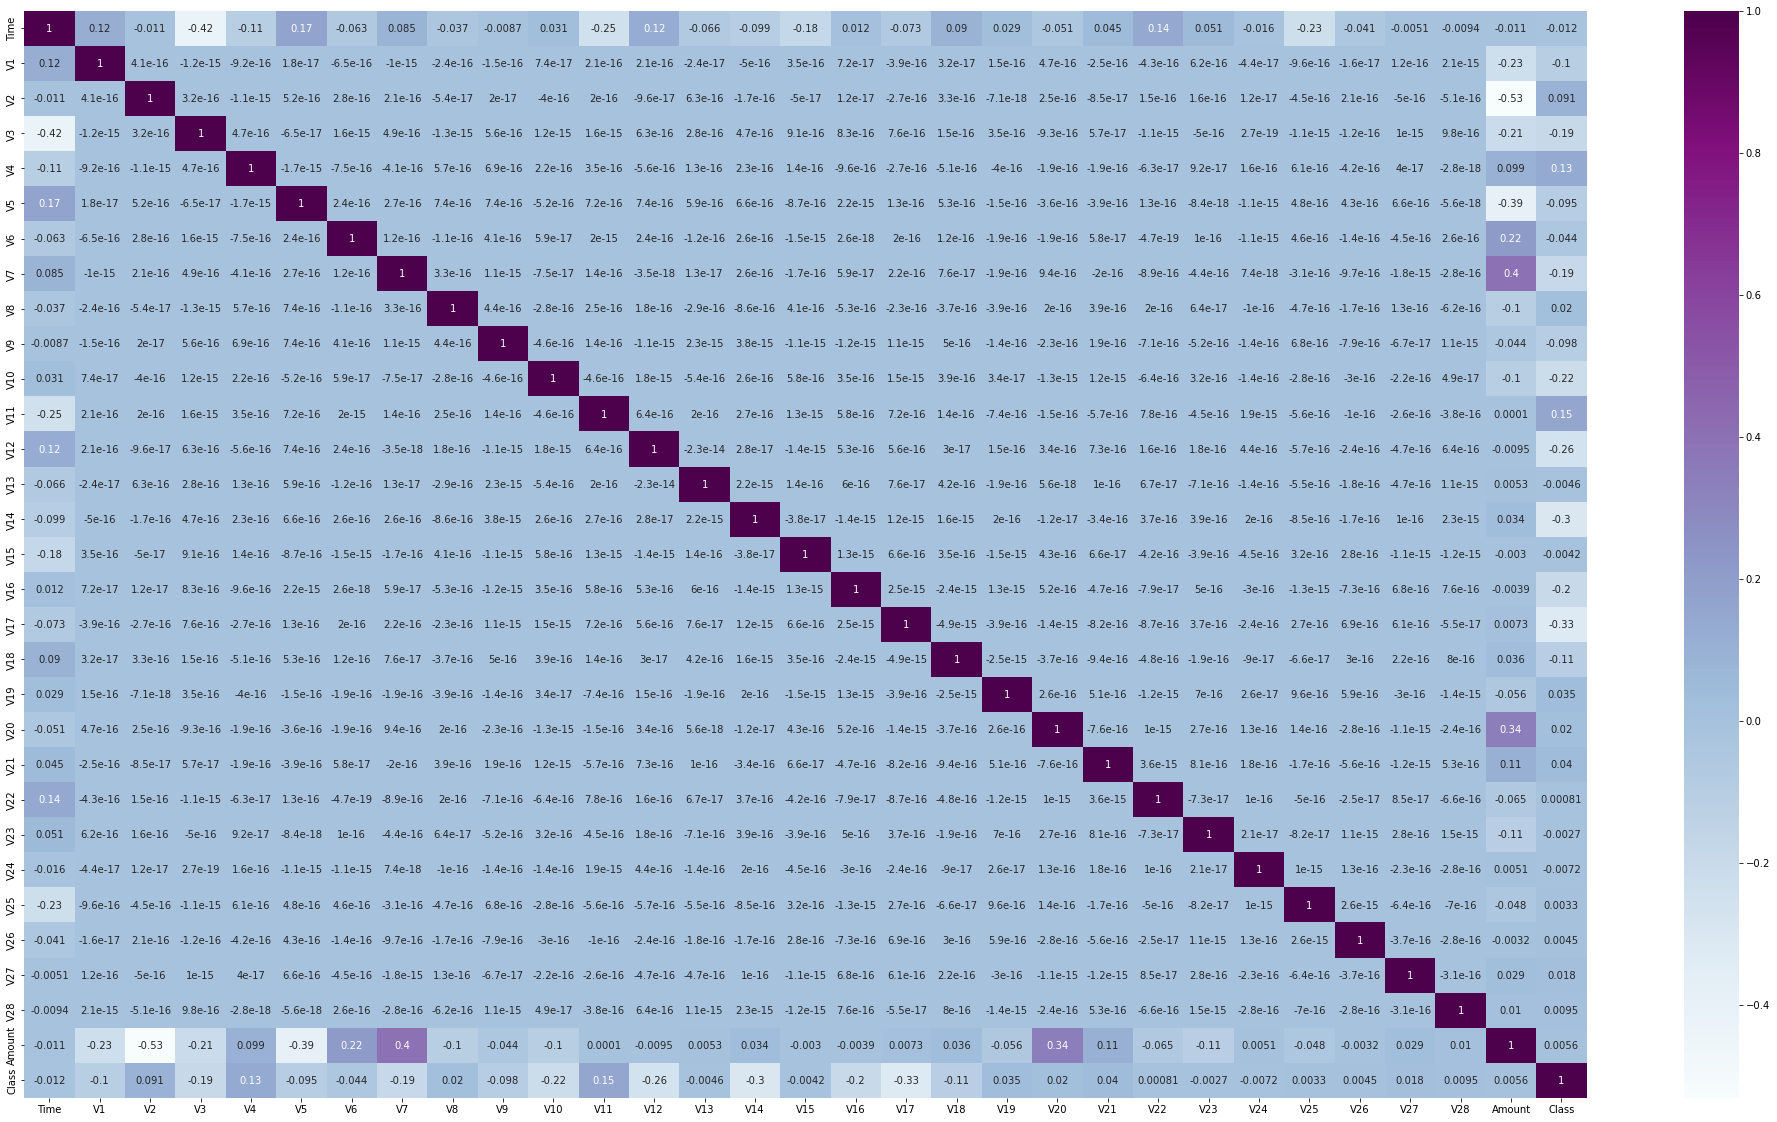

In [15]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(35, 20))

# Create a heatmap to visualize the correlation matrix of the DataFrame df
sns.heatmap(df.corr(), annot=True, cmap = 'BuPu')

In [16]:
# Calculate the correlation coefficients between 'Class' and all columns
y = df.corr()['Class']

# Create a copy of the DataFrame df
df2 = df.copy()

# Iterate through columns and drop those with absolute correlation less than 0.13
for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)

In [17]:
df2.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


<AxesSubplot:>

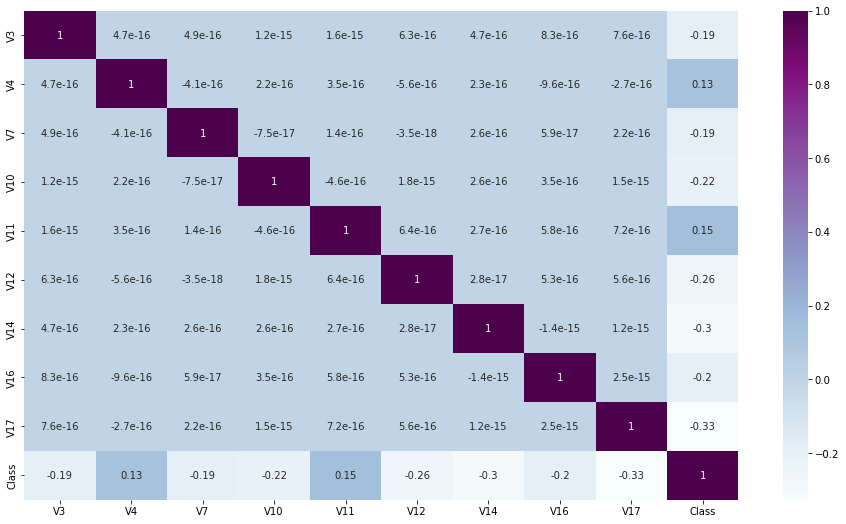

In [18]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df2
sns.heatmap(df2.corr(), annot=True, cmap = 'BuPu')

<AxesSubplot:title={'center':'Top Correlated Features With The Target Variable'}>

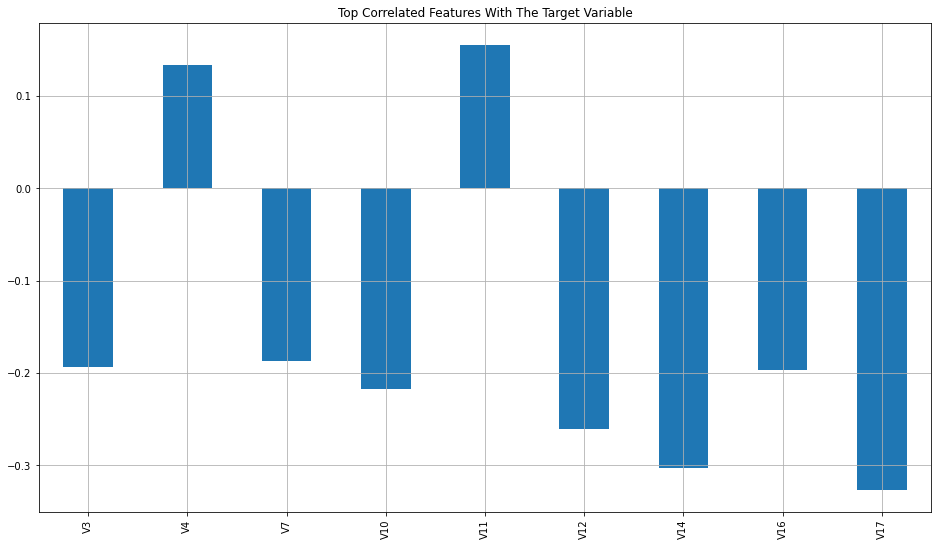

In [19]:
# Calculate the correlation coefficients between the 'Class' column 
x = df2.corr()['Class'][:9]

# Create a bar plot to visualize the top correlated features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Top Correlated Features With The Target Variable", grid=True)

# Handling Data Imbalance

This dataset consists of:
Number of records with the class value 0: 284,315
Number of records with the class value 1: 492
Using this dataset as it is would be a fatal mistake due to its severe class imbalance. Here's why:

Using the data as it is:

>The overwhelming majority of records belong to the non-fraudulent class (class 0), making up over 99% of the dataset.
Models trained on imbalanced data may prioritize accuracy on the majority class while neglecting the minority class (fraudulent transactions). This can result in poor performance in detecting fraud.
Why oversampling is a fatal mistake:

>Oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) artificially inflate the minority class by generating synthetic examples. However, this can lead to overfitting and the introduction of noise, especially in cases where the minority class is already sparsely represented.
Why downsampling is the best option:

>Downsampling involves randomly reducing the number of samples in the majority class to balance it with the minority class. This approach helps mitigate the biases towards the majority class while maintaining the integrity of the dataset.
By reducing the number of majority class samples to match the minority class, downsampling encourages the model to learn from both classes equally, improving its ability to accurately detect fraudulent transactions.

In [20]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df2.drop('Class', axis=1)
y = df2['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
138028,-0.666593,0.716564,0.388881,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117,0
63099,0.904547,0.694584,0.495236,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570,0
73411,1.122074,-1.308725,-0.701304,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141,0
164247,-0.987421,-0.029567,0.775644,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234,0
148999,0.269272,3.866438,-0.721945,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076,0


In [22]:
downsampled_df.shape

(984, 10)

# Outliners

<AxesSubplot:xlabel='Class', ylabel='count'>

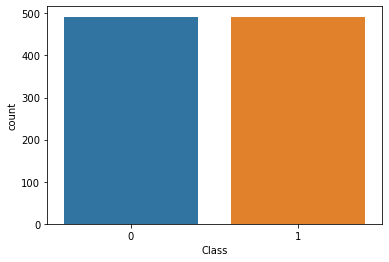

In [23]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the downsampled DataFrame downsampled_df
sns.countplot(x='Class', data=downsampled_df)

<AxesSubplot:xlabel='V11', ylabel='V17'>

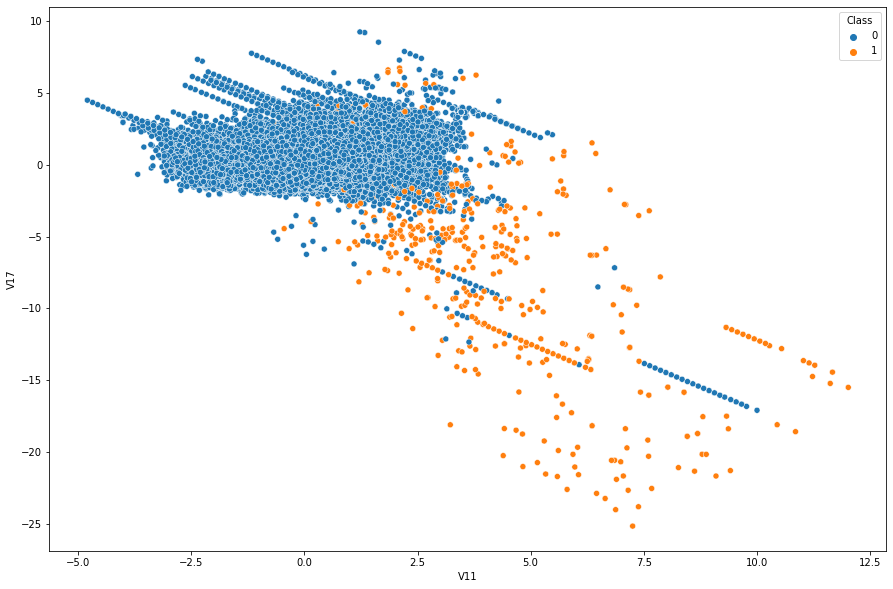

In [24]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='V11', y='V17', hue='Class', data=df2)

<Figure size 1080x720 with 0 Axes>

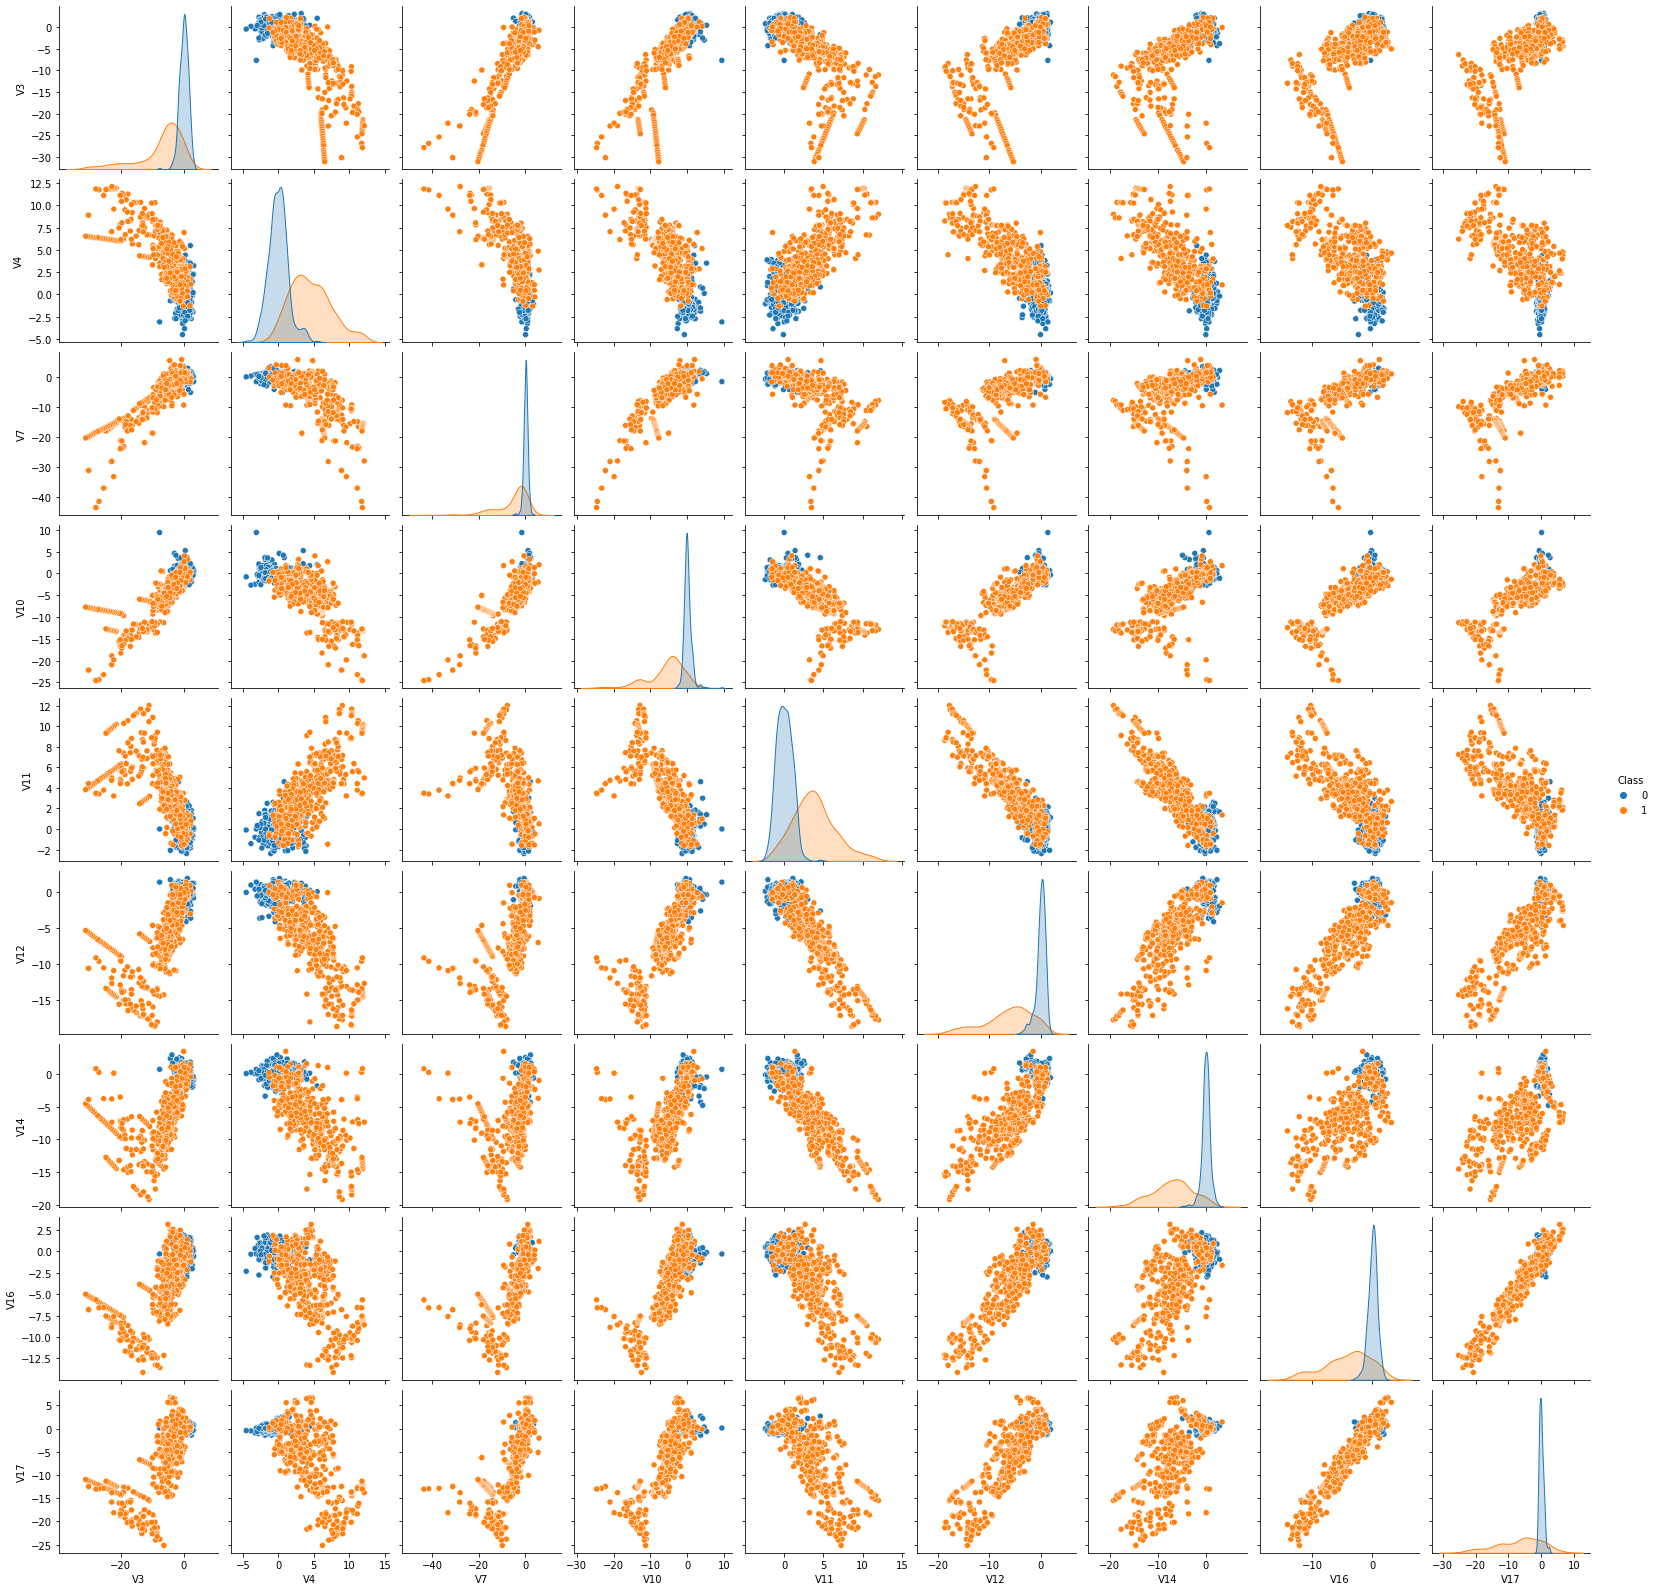

In [25]:
plt.figure(figsize=(15, 10))
sns.pairplot(downsampled_df, hue='Class')

Fraudulent transactions do not exhibit clustering behavior and do not conform to a normal distribution, making outlier identification challenging.
- This phenomenon arises because fraud does not adhere to a typical distribution pattern; in other words, fraudulent activities vary widely and do not consistently follow specific patterns.
- Fraudsters employ diverse methods that evolve over time. It's important to note that simply obtaining credit card details and full names is insufficient for completing transactions. Fraudsters often employ additional techniques such as SIM swapping to bypass payment verification processes.
- Due to these factors, datasets containing fraudulent transactions lack distinct clustering and do not adhere to a normal distribution.
For these reasons, no records will be deleted from fraudulent transactions. Additionally, it's important to consider that fraudulent transactions are rare, making each record valuable.
Note: Outliers can still be removed from normal transactions (non-fraudulent transactions).

In [26]:
downsampled_df.groupby('Class').mean()

,V3,V4,V7,V10,V11,V12,V14,V16,V17
Class,,,,,,,,,
0,-0.038029,-0.027323,0.013795,0.036243,0.009857,-0.004117,0.016583,0.011533,0.008115
1,-7.033281,4.542029,-5.568731,-5.676883,3.800173,-6.259393,-6.971723,-4.139946,-6.665836


# Splitting the data into Features & Targets

In [27]:
X = downsampled_df.drop(columns=['Class'],axis=1)
Y = downsampled_df['Class']

In [28]:
X

,V3,V4,V7,V10,V11,V12,V14,V16,V17
138028,-0.666593,0.716564,0.388881,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117
63099,0.904547,0.694584,0.495236,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570
73411,1.122074,-1.308725,-0.701304,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141
164247,-0.987421,-0.029567,0.775644,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234
148999,0.269272,3.866438,-0.721945,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076
...,...,...,...,...,...,...,...,...,...
279863,-4.518331,1.749293,-0.882850,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529
280143,-5.004247,1.411850,-1.413170,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116
280149,-2.213700,0.468308,-2.234739,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326
281144,-5.399730,1.817092,-2.208002,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717


In [29]:
Y

138028    0
63099     0
73411     0
164247    0
148999    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(984, 9) (590, 9) (394, 9)


In [32]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (590,) (394,)


# Model Building

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [35]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9491525423728814


In [37]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046


In [39]:
print(confusion_matrix(Y_test,X_test_prediction))

[[194   3]
 [ 27 170]]


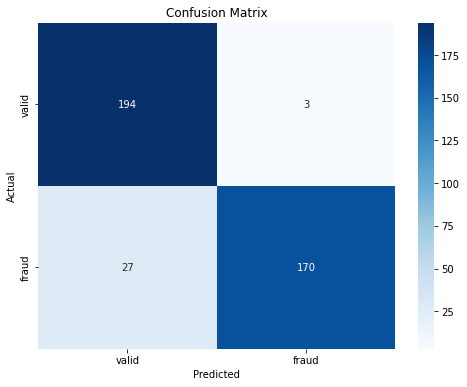

In [43]:
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['valid', 'fraud'], 
            yticklabels=['valid', 'fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       197
           1       0.98      0.86      0.92       197

    accuracy                           0.92       394
   macro avg       0.93      0.92      0.92       394
weighted avg       0.93      0.92      0.92       394

